In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def RRF(v, k, ang):
    matrix = v*np.cos(ang) + np.cross(k, v)*np.sin(ang) + k*np.dot(k, v)*(1 - np.cos(ang))
    return matrix

#p = 1.085/2
p = 0.5*np.sqrt((0.450+0.425)**2 + (0.350+0.350)**2)
w = RRF(np.array([p, 0, 0]), np.array([0,0,1]), np.deg2rad(60))
#rotates the point (0,p) 60 deg to the right

slope = (p - w[0])/w[1]

def VolumeTester(x, y, z):
    if -0.5 <= z <= 0.5:
        if x == w[1]:
            if -w[0] <= y <= w[0]:
                return True
        elif x == -w[1]:
            if -w[0] <= y <= w[0]:
                return True
        elif x > 0 and y > 0:
            if x <= w[1]:
                if y <= -x*(slope) + p:
                    return True
        elif x < 0 and y > 0:
            if x >= -w[1]:
                if y <= x*(slope) + p:
                    return True
        elif x < 0 and y < 0:
            if x >= -w[1]:
                if y >= -x*(slope) - p:
                    return True
        else:
            if x <= w[1]:
                if y >= x*(slope) - p:
                    return True
    return False

def LinePlaneCollision(planeNormal, planePoint, rayDirection, rayPoint, epsilon=1e-6):
 
    ndotu = planeNormal.dot(rayDirection)
    if abs(ndotu) >= epsilon:
        w = rayPoint - planePoint
        si = -planeNormal.dot(w) / ndotu
        Psi = w + si * rayDirection + planePoint
        #if VolumeTester(Psi[0], Psi[1], Psi[2]):
        #    return Psi
        #else:
        #    return np.nan
        return Psi
    else:
        return np.nan
    


In [3]:
vertx = np.zeros(1000) + w[1]
verty = np.linspace(-w[0], w[0], 1000)


sidey1 = []
sidey4 = []
posxs = np.linspace(0, w[1], 1000)

for i in posxs:
    sidey1.append(-i*(slope) + p)
    sidey4.append(i*(slope) - p)

sidey2 = []
sidey3 = []
negxs = np.linspace(-w[1], 0, 1000)
for i in negxs:
    sidey2.append(i*(slope) + p)
    sidey3.append(-i*(slope) - p)

Hexagonx = [*vertx, *posxs, *negxs, *-vertx, *negxs, *posxs]
Hexagony = [*verty, *sidey1, *sidey2, *verty, *sidey3, *sidey4]

__BELOW IS GETTING LENGTH OF ICECUBE FROM INPUTED ANGLE AND RANDOM POINT ON NORMAL PLANE__

Enter a non-zero phi angle between -90 and 90: 12
Enter a theta angle between 0 and 360: 12
[array([ 0.48521097, -0.22736513, -0.34190623]), array([ 1.1276941 , -0.09080112, -0.20534222]), array([-2.44185483, -0.84953217, -0.96407327]), array([-0.48521097, -0.43363468, -0.54817578]), array([-0.29088679, -0.3923298 , -0.5068709 ]), array([ 0.62987234, -0.19661641, -0.31115751]), array([4.44606836, 0.6145411 , 0.5       ]), array([-0.25856175, -0.3854589 , -0.5       ])]
[False, False, False, False, False, False, False, False]


<IPython.core.display.Javascript object>


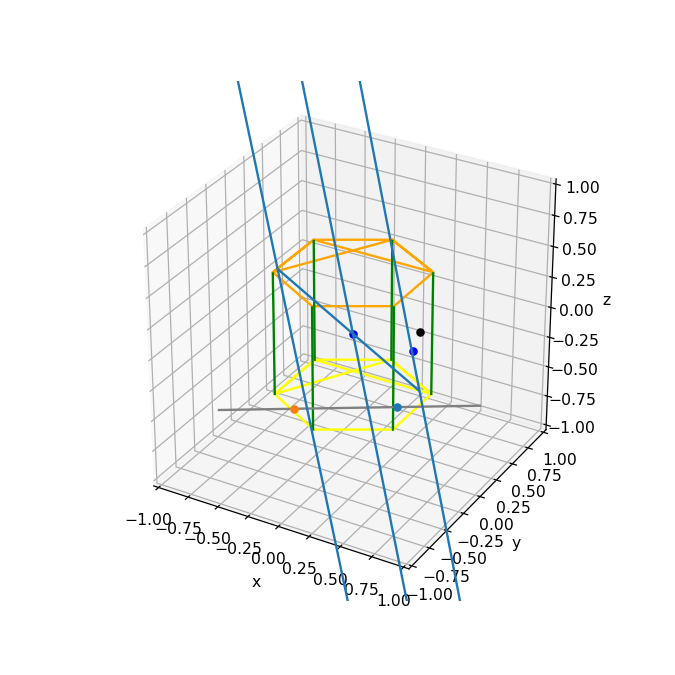

The equation of the plane is: 0.48521097215541203x + 0.10313477592592322y + 0.10313477592592322z + -0.0 = 0
The points of intersection are:  [array([ 0.48521097, -0.22736513, -0.34190623]), array([-0.25856175, -0.3854589 , -0.5       ])]
The distance between the two points are:  0.7766499462052239
1.3457920551300049


In [4]:
import time 
start = time.time()

delta = 1e-6
max_ang = np.degrees(np.arctan(0.5/p))
phi = float(input('Enter a non-zero phi angle between -90 and 90: '))
theta = float(input('Enter a theta angle between 0 and 360: '))

if -max_ang <= phi <= max_ang:
    if 0 <= theta < 30:
        phi = np.deg2rad(phi)
        theta = np.deg2rad(theta)
        x = w[1]
        y = x*np.tan(theta)
        z = x*np.tan(phi)
    elif 30 <= theta < 90:
        theta -= 60
        phi = np.deg2rad(phi)
        theta = np.deg2rad(theta)
        x1 = w[1]
        y1 = x1*np.tan(theta)
        z1 = x1*np.tan(phi)
        new = RRF(np.array([x1, y1, z1]), np.array([0, 0, 1]), np.deg2rad(60))
        x = new[0]
        y = new[1]
        z = new[2]
    elif 90 <= theta < 150:
        theta -= 120
        phi = np.deg2rad(phi)
        theta = np.deg2rad(theta)
        x1 = w[1]
        y1 = x1*np.tan(theta)
        z1 = x1*np.tan(phi)
        new = RRF(np.array([x1, y1, z1]), np.array([0, 0, 1]), np.deg2rad(60))
        almost = RRF(np.array([new[0], new[1], new[2]]), np.array([0, 0, 1]) , np.deg2rad(60))
        x = almost[0]
        y = almost[1]
        z = almost[2]
    elif 150 <= theta < 210:
        theta -= 180
        phi = np.deg2rad(phi)
        theta = np.deg2rad(theta)
        x1 = w[1]
        y1 = x1*np.tan(theta)
        z1 = x1*np.tan(phi)
        new = RRF(np.array([x1, y1, z1]), np.array([0, 0, 1]), np.deg2rad(60))
        newer = RRF(np.array([new[0], new[1], new[2]]), np.array([0, 0, 1]), np.deg2rad(60))
        almost = RRF(np.array([newer[0], newer[1], newer[2]]), np.array([0, 0, 1]), np.deg2rad(60))
        x = almost[0]
        y = almost[1]
        z = almost[2]
    elif 210 <= theta < 270:
        theta -= 240
        phi = np.deg2rad(phi)
        theta = np.deg2rad(theta)
        x1 = w[1]
        y1 = x1*np.tan(theta)
        z1 = x1*np.tan(phi)
        new = RRF(np.array([x1, y1, z1]), np.array([0, 0, 1]), np.deg2rad(-60))
        almost = RRF(np.array([new[0], new[1], new[2]]), np.array([0, 0, 1]), np.deg2rad(-60))
        x = almost[0]
        y = almost[1]
        z = almost[2]
    elif 270 <= theta < 330:
        theta -= 300
        phi = np.deg2rad(phi)
        theta = np.deg2rad(theta)
        x1 = w[1]
        y1 = x1*np.tan(theta)
        z1 = x1*np.tan(phi)
        new = RRF(np.array([x1, y1, z1]), np.array([0, 0, 1]), np.deg2rad(-60))
        x = new[0]
        y = new[1]
        z = new[2]
    else:
        theta -= 360
        phi = np.deg2rad(phi)
        theta = np.deg2rad(theta)
        x = w[1]
        y = x*np.tan(theta)
        z = x*np.tan(phi)

elif phi > max_ang:
    if 0 <= theta < 30:
        phi = np.deg2rad(phi)
        theta = np.deg2rad(theta)
        z = 0.5
        x = z*np.cos(theta)/np.tan(phi)
        y = z*np.sin(theta)/np.tan(phi)
    elif 30 <= theta < 90:
        theta -= 60
        phi = np.deg2rad(phi)
        theta = np.deg2rad(theta)
        z1 = 0.5
        x1 = z1*np.cos(theta)/np.tan(phi)
        y1 = z1*np.sin(theta)/np.tan(phi)
        new = RRF(np.array([x1, y1, z1]), np.array([0, 0, 1]), np.deg2rad(60))
        x = new[0]
        y = new[1]
        z = new[2]
    elif 90 <= theta < 150:
        theta -= 120
        phi = np.deg2rad(phi)
        theta = np.deg2rad(theta)
        z1 = 0.5
        x1 = z1*np.cos(theta)/np.tan(phi)
        y1 = z1*np.sin(theta)/np.tan(phi)
        new = RRF(np.array([x1, y1, z1]), np.array([0, 0, 1]), np.deg2rad(60))
        almost = RRF(np.array([new[0], new[1], new[2]]), np.array([0, 0, 1]), np.deg2rad(60))
        x = almost[0]
        y = almost[1]
        z = almost[2]
    elif 150 <= theta < 210:
        theta -= 180
        phi = np.deg2rad(phi)
        theta = np.deg2rad(theta)
        z1 = 0.5
        x1 = z1*np.cos(theta)/np.tan(phi)
        y1 = z1*np.sin(theta)/np.tan(phi)
        new = RRF(np.array([x1, y1, z1]), np.array([0, 0, 1]), np.deg2rad(60))
        newer = RRF(np.array([new[0], new[1], new[2]]), np.array([0, 0, 1]), np.deg2rad(60))
        almost = RRF(np.array([newer[0], newer[1], newer[2]]), np.array([0, 0, 1]), np.deg2rad(60))
        x = almost[0]
        y = almost[1]
        z = almost[2]
    elif 210 <= theta < 270:
        theta -= 240
        phi = np.deg2rad(phi)
        theta = np.deg2rad(theta)
        z1 = 0.5
        x1 = z1*np.cos(theta)/np.tan(phi)
        y1 = z1*np.sin(theta)/np.tan(phi)
        new = RRF(np.array([x1, y1, z1]), np.array([0, 0, 1]), np.deg2rad(-60))
        almost = RRF(np.array([new[0], new[1], new[2]]), np.array([0, 0, 1]), np.deg2rad(-60))
        x = almost[0]
        y = almost[1]
        z = almost[2]
    elif 270 <= theta < 330:
        theta -= 300
        phi = np.deg2rad(phi)
        theta = np.deg2rad(theta)
        z1 = 0.5
        x1 = z1*np.cos(theta)/np.tan(phi)
        y1 = z1*np.sin(theta)/np.tan(phi)
        new = RRF(np.array([x1, y1, z1]), np.array([0, 0, 1]), np.deg2rad(-60))
        x = new[0]
        y = new[1]
        z = new[2]
    else:
        theta -= 360
        phi = np.deg2rad(phi)
        theta = np.deg2rad(theta)
        z = 0.5
        x = z*np.cos(theta)/np.tan(phi)
        y = z*np.sin(theta)/np.tan(phi)

elif phi < -max_ang:
    if 0 <= theta < 30:
        phi = np.deg2rad(phi)
        theta = np.deg2rad(theta)
        z = -0.5
        x = z*np.cos(theta)/np.tan(phi)
        y = z*np.sin(theta)/np.tan(phi)
    elif 30 <= theta < 90:
        theta -= 60
        phi = np.deg2rad(phi)
        theta = np.deg2rad(theta)
        z1 = -0.5
        x1 = z1*np.cos(theta)/np.tan(phi)
        y1 = z1*np.sin(theta)/np.tan(phi)
        new = RRF(np.array([x1, y1, z1]), np.array([0, 0, 1]), np.deg2rad(60))
        x = new[0]
        y = new[1]
        z = new[2]
    elif 90 <= theta < 150:
        theta -= 120
        phi = np.deg2rad(phi)
        theta = np.deg2rad(theta)
        z1 = -0.5
        x1 = z1*np.cos(theta)/np.tan(phi)
        y1 = z1*np.sin(theta)/np.tan(phi)
        new = RRF(np.array([x1, y1, z1]), np.array([0, 0, 1]), np.deg2rad(60))
        almost = RRF(np.array([new[0], new[1], new[2]]), np.array([0, 0, 1]), np.deg2rad(60))
        x = almost[0]
        y = almost[1]
        z = almost[2]
    elif 150 <= theta < 210:
        theta -= 180
        phi = np.deg2rad(phi)
        theta = np.deg2rad(theta)
        z1 = -0.5
        x1 = z1*np.cos(theta)/np.tan(phi)
        y1 = z1*np.sin(theta)/np.tan(phi)
        new = RRF(np.array([x1, y1, z1]), np.array([0, 0, 1]), np.deg2rad(60))
        newer = RRF(np.array([new[0], new[1], new[2]]), np.array([0, 0, 1]), np.deg2rad(60))
        almost = RRF(np.array([newer[0], newer[1], newer[2]]), np.array([0, 0, 1]), np.deg2rad(60))
        x = almost[0]
        y = almost[1]
        z = almost[2]
    elif 210 <= theta < 270:
        theta -= 240
        phi = np.deg2rad(phi)
        theta = np.deg2rad(theta)
        z1 = -0.5
        x1 = z1*np.cos(theta)/np.tan(phi)
        y1 = z1*np.sin(theta)/np.tan(phi)
        new = RRF(np.array([x1, y1, z1]), np.array([0, 0, 1]), np.deg2rad(-60))
        almost = RRF(np.array([new[0], new[1], new[2]]), np.array([0, 0, 1]), np.deg2rad(-60))
        x = almost[0]
        y = almost[1]
        z = almost[2]
    elif 270 <= theta < 330:
        theta -= 300
        phi = np.deg2rad(phi)
        theta = np.deg2rad(theta)
        z1 = -0.5
        x1 = z1*np.cos(theta)/np.tan(phi)
        y1 = z1*np.sin(theta)/np.tan(phi)
        new = RRF(np.array([x1, y1, z1]), np.array([0, 0, 1]), np.deg2rad(-60))
        x = new[0]
        y = new[1]
        z = new[2]
    else:
        theta -= 360
        phi = np.deg2rad(phi)
        theta = np.deg2rad(theta)
        z = -0.5
        x = z*np.cos(theta)/np.tan(phi)
        y = z*np.sin(theta)/np.tan(phi)

#The mess of code above gets the normal vector based off theta and phi        
#the next few lines get the actual plane
center  = np.array([0, 0, 0])
normal = np.array([x, y, z])

# a plane is a*x+b*y+c*z+d=0
# [a,b,c] is the normal. Thus, we have to calculate
# d and we're set
d = -center.dot(normal)

# create x,y
xx, yy = np.meshgrid(range(-1, 2), range(-1 ,2))

# calculate corresponding z
zz = (-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]

#grab a random point on the plane within the volume

test = False
while test != True:
    xn = np.random.uniform(-w[1], w[1])
    yn = np.random.uniform(-p,p)
    zn = (d - normal[0]*xn - normal[1]*yn)/normal[2]
    if VolumeTester(xn, yn, zn):
        test = True
    
wn = np.array([xn, yn, zn])

shifted = normal + wn

#get the ray connecting the shifted points
t = np.arange(-2, 2, 0.1)
q = shifted - wn
rayx = wn[0] + q[0]*t
rayy = wn[1] + q[1]*t
rayz = wn[2] + q[2]*t

#generate lines connecting top and bottom
ax = np.zeros(100)
ay = np.arange(-0.5, 0.5, 0.5/50)

#Grabbing normal vector off each plane
raypoint = wn
raydirection = normal

'''
pn1 = np.array([np.sqrt(3)/2, 0, 0])
pn2 = RRF(pn1, np.array([0, 0, 1]), np.deg2rad(60))/np.linalg.norm(RRF(pn1, np.array([0, 0, 1]), np.deg2rad(60)))
pn3 = RRF(pn2, np.array([0, 0, 1]), np.deg2rad(60))/np.linalg.norm(RRF(pn2, np.array([0, 0, 1]), np.deg2rad(60)))
pn4 = RRF(pn3, np.array([0, 0, 1]), np.deg2rad(60))/np.linalg.norm(RRF(pn3, np.array([0, 0, 1]), np.deg2rad(60)))
pn5 = RRF(pn4, np.array([0, 0, 1]), np.deg2rad(60))/np.linalg.norm(RRF(pn4, np.array([0, 0, 1]), np.deg2rad(60)))
pn6 = RRF(pn5, np.array([0, 0, 1]), np.deg2rad(60))/np.linalg.norm(RRF(pn5, np.array([0, 0, 1]), np.deg2rad(60)))
pn7 = np.array([0, 0, 1])
pn8 = -pn7
'''
pn1 = np.array([1, 0, 0])
pn2 = np.array([0.5, np.sqrt(3)/2, 0])
pn3 = np.array([-0.5, np.sqrt(3)/2, 0])
pn4 = np.array([-1, 0, 0])
pn5 = np.array([-0.5, -np.sqrt(3)/2, 0])
pn6 = np.array([0.5, -np.sqrt(3)/2, 0])
pn7 = np.array([0, 0, 1])
pn8 = np.array([0, 0, -1])

norms = [pn1, pn2, pn3, pn4, pn5, pn6, pn7, pn8]

#grabbing random point off each plane and finding intersection
pointsx = [vertx, posxs, negxs, -vertx, negxs, posxs]
pointsy = [verty, sidey1, sidey2, verty, sidey3, sidey4]

pp1 = np.array([w[1], 0, 0])
pp2 = RRF(pp1, np.array([0, 0, 1]), np.deg2rad(60))
pp3 = RRF(pp2, np.array([0, 0, 1]), np.deg2rad(60))
pp4 = RRF(pp3, np.array([0, 0, 1]), np.deg2rad(60))
pp5 = RRF(pp4, np.array([0, 0, 1]), np.deg2rad(60))
pp6 = RRF(pp5, np.array([0, 0, 1]), np.deg2rad(60))
pp7 = np.array([0, 0, 0.5])
pp8 = -pp7

points = [pp1, pp2, pp3, pp4, pp5, pp6, pp7, pp8]

pospoint = [LinePlaneCollision(norms[i], points[i], raydirection, raypoint) for i in range(len(norms))]
check = [np.all(np.isnan(LinePlaneCollision(norms[i], points[i], raydirection, raypoint))) for i in range(len(norms))]
print(pospoint)
print(check)
'''
p = []
for i in range(len(check)):
    if not check[i]:
        p.append(pospoint[i])
        #print(pospoint[i])
'''
pas = []
fail = []
for i in range(len(check)):
    if not check[i]:
        if VolumeTester(pospoint[i][0], pospoint[i][1], pospoint[i][2]) or VolumeTester(pospoint[i][0] + delta, pospoint[i][1] + delta, pospoint[i][2] + delta) or VolumeTester(pospoint[i][0]-delta, pospoint[i][1]-delta, pospoint[i][2]-delta):
            pas.append(pospoint[i])
        else:
            fail.append(pospoint[i])
# plot everything
%matplotlib notebook

plt3d = plt.figure(figsize = (6,6)).gca(projection='3d')

plt3d.plot_wireframe(xx, yy, zz)
plt3d.plot(Hexagonx, Hexagony, -0.5, color = 'yellow')
plt3d.plot(Hexagonx, Hexagony, 0.5, color = 'orange')
plt3d.plot(ax + p, ay, 0, zdir = 'x', color = 'green')
plt3d.plot(ax - p, ay, 0, zdir = 'x', color = 'green')
plt3d.plot(ax + w[0], ay, w[1], zdir = 'x', color = 'green')
plt3d.plot(ax - w[0], ay, w[1], zdir = 'x', color = 'green')
plt3d.plot(ax + w[0], ay, -w[1], zdir = 'x', color = 'green')
plt3d.plot(ax - w[0], ay, -w[1], zdir = 'x', color = 'green')
plt3d.plot(rayx, rayy, rayz, color = 'gray')
plt3d.scatter(x, y, z, color = 'black')
#plt3d.scatter(wn[0], wn[1], wn[2], color = 'red')
#plt3d.scatter(shifted[0], shifted[1], shifted[2], color = 'purple')
plt3d.scatter(w[1], 0, 0, color = 'blue')
plt3d.scatter(0, 0, 0, color = 'blue')
for ps in range(len(pas)):
    plt3d.scatter(pas[ps][0], pas[ps][1], pas[ps][2])
    #print(p[ps][0], p[ps][1], p[ps][2])



plt3d.set_xlabel('x')
plt3d.set_ylabel('y')
plt3d.set_zlabel('z')


plt3d.set_xlim(-1,1)
plt3d.set_ylim(-1,1)
plt3d.set_zlim(-1,1)

plt.show()


print('The equation of the plane is: {}x + {}y + {}z + {} = 0'.format(normal[0], normal[1], normal[2], d))
#print(wn[0], wn[1], wn[2])
print('The points of intersection are: ', pas)
if len(pas) == 2:
    print('The distance between the two points are: ', np.linalg.norm(pas[1] - pas[0]))
else:
    print('Only returned one point or none, not counting this one')
    
end = time.time()

print(end-start)

__BELOW IS GETTING AVERAGE LENGTH FROM X AMOUNT OF RANDOM ANGLES AND RANDOM POINTS ON NORMAL PLANE__

In [4]:
delta = 1e-6
max_ang = np.degrees(np.arctan(0.5/p))
pavg = []
bigpx = []
bigpy = []
pphi = []
pthe = []
missed = 0

for coun in range(65):
    phi = np.random.uniform(-90,90)
    theta = np.random.uniform(0,360)
    
    if phi != 0:
        pphi.append(phi)
        pthe.append(theta)
        
        if -max_ang <= phi <= max_ang:
            if 0 <= theta < 30:
                phi = np.deg2rad(phi)
                theta = np.deg2rad(theta)
                x = w[1]
                y = x*np.tan(theta)
                z = x*np.tan(phi)
            elif 30 <= theta < 90:
                theta -= 60
                phi = np.deg2rad(phi)
                theta = np.deg2rad(theta)
                x1 = w[1]
                y1 = x1*np.tan(theta)
                z1 = x1*np.tan(phi)
                new = RRF(np.array([x1, y1, z1]), np.array([0, 0, 1]), np.deg2rad(60))
                x = new[0]
                y = new[1]
                z = new[2]
            elif 90 <= theta < 150:
                theta -= 120
                phi = np.deg2rad(phi)
                theta = np.deg2rad(theta)
                x1 = w[1]
                y1 = x1*np.tan(theta)
                z1 = x1*np.tan(phi)
                new = RRF(np.array([x1, y1, z1]), np.array([0, 0, 1]), np.deg2rad(60))
                almost = RRF(np.array([new[0], new[1], new[2]]), np.array([0, 0, 1]) , np.deg2rad(60))
                x = almost[0]
                y = almost[1]
                z = almost[2]
            elif 150 <= theta < 210:
                theta -= 180
                phi = np.deg2rad(phi)
                theta = np.deg2rad(theta)
                x1 = w[1]
                y1 = x1*np.tan(theta)
                z1 = x1*np.tan(phi)
                new = RRF(np.array([x1, y1, z1]), np.array([0, 0, 1]), np.deg2rad(60))
                newer = RRF(np.array([new[0], new[1], new[2]]), np.array([0, 0, 1]), np.deg2rad(60))
                almost = RRF(np.array([newer[0], newer[1], newer[2]]), np.array([0, 0, 1]), np.deg2rad(60))
                x = almost[0]
                y = almost[1]
                z = almost[2]
            elif 210 <= theta < 270:
                theta -= 240
                phi = np.deg2rad(phi)
                theta = np.deg2rad(theta)
                x1 = w[1]
                y1 = x1*np.tan(theta)
                z1 = x1*np.tan(phi)
                new = RRF(np.array([x1, y1, z1]), np.array([0, 0, 1]), np.deg2rad(-60))
                almost = RRF(np.array([new[0], new[1], new[2]]), np.array([0, 0, 1]), np.deg2rad(-60))
                x = almost[0]
                y = almost[1]
                z = almost[2]
            elif 270 <= theta < 330:
                theta -= 300
                phi = np.deg2rad(phi)
                theta = np.deg2rad(theta)
                x1 = w[1]
                y1 = x1*np.tan(theta)
                z1 = x1*np.tan(phi)
                new = RRF(np.array([x1, y1, z1]), np.array([0, 0, 1]), np.deg2rad(-60))
                x = new[0]
                y = new[1]
                z = new[2]
            else:
                theta -= 360
                phi = np.deg2rad(phi)
                theta = np.deg2rad(theta)
                x = w[1]
                y = x*np.tan(theta)
                z = x*np.tan(phi)

        elif phi > max_ang:
            if 0 <= theta < 30:
                phi = np.deg2rad(phi)
                theta = np.deg2rad(theta)
                z = 0.5
                x = z*np.cos(theta)/np.tan(phi)
                y = z*np.sin(theta)/np.tan(phi)
            elif 30 <= theta < 90:
                theta -= 60
                phi = np.deg2rad(phi)
                theta = np.deg2rad(theta)
                z1 = 0.5
                x1 = z1*np.cos(theta)/np.tan(phi)
                y1 = z1*np.sin(theta)/np.tan(phi)
                new = RRF(np.array([x1, y1, z1]), np.array([0, 0, 1]), np.deg2rad(60))
                x = new[0]
                y = new[1]
                z = new[2]
            elif 90 <= theta < 150:
                theta -= 120
                phi = np.deg2rad(phi)
                theta = np.deg2rad(theta)
                z1 = 0.5
                x1 = z1*np.cos(theta)/np.tan(phi)
                y1 = z1*np.sin(theta)/np.tan(phi)
                new = RRF(np.array([x1, y1, z1]), np.array([0, 0, 1]), np.deg2rad(60))
                almost = RRF(np.array([new[0], new[1], new[2]]), np.array([0, 0, 1]), np.deg2rad(60))
                x = almost[0]
                y = almost[1]
                z = almost[2]
            elif 150 <= theta < 210:
                theta -= 180
                phi = np.deg2rad(phi)
                theta = np.deg2rad(theta)
                z1 = 0.5
                x1 = z1*np.cos(theta)/np.tan(phi)
                y1 = z1*np.sin(theta)/np.tan(phi)
                new = RRF(np.array([x1, y1, z1]), np.array([0, 0, 1]), np.deg2rad(60))
                newer = RRF(np.array([new[0], new[1], new[2]]), np.array([0, 0, 1]), np.deg2rad(60))
                almost = RRF(np.array([newer[0], newer[1], newer[2]]), np.array([0, 0, 1]), np.deg2rad(60))
                x = almost[0]
                y = almost[1]
                z = almost[2]
            elif 210 <= theta < 270:
                theta -= 240
                phi = np.deg2rad(phi)
                theta = np.deg2rad(theta)
                z1 = 0.5
                x1 = z1*np.cos(theta)/np.tan(phi)
                y1 = z1*np.sin(theta)/np.tan(phi)
                new = RRF(np.array([x1, y1, z1]), np.array([0, 0, 1]), np.deg2rad(-60))
                almost = RRF(np.array([new[0], new[1], new[2]]), np.array([0, 0, 1]), np.deg2rad(-60))
                x = almost[0]
                y = almost[1]
                z = almost[2]
            elif 270 <= theta < 330:
                theta -= 300
                phi = np.deg2rad(phi)
                theta = np.deg2rad(theta)
                z1 = 0.5
                x1 = z1*np.cos(theta)/np.tan(phi)
                y1 = z1*np.sin(theta)/np.tan(phi)
                new = RRF(np.array([x1, y1, z1]), np.array([0, 0, 1]), np.deg2rad(-60))
                x = new[0]
                y = new[1]
                z = new[2]
            else:
                theta -= 360
                phi = np.deg2rad(phi)
                theta = np.deg2rad(theta)
                z = 0.5
                x = z*np.cos(theta)/np.tan(phi)
                y = z*np.sin(theta)/np.tan(phi)

        elif phi < -max_ang:
            if 0 <= theta < 30:
                phi = np.deg2rad(phi)
                theta = np.deg2rad(theta)
                z = -0.5
                x = z*np.cos(theta)/np.tan(phi)
                y = z*np.sin(theta)/np.tan(phi)
            elif 30 <= theta < 90:
                theta -= 60
                phi = np.deg2rad(phi)
                theta = np.deg2rad(theta)
                z1 = -0.5
                x1 = z1*np.cos(theta)/np.tan(phi)
                y1 = z1*np.sin(theta)/np.tan(phi)
                new = RRF(np.array([x1, y1, z1]), np.array([0, 0, 1]), np.deg2rad(60))
                x = new[0]
                y = new[1]
                z = new[2]
            elif 90 <= theta < 150:
                theta -= 120
                phi = np.deg2rad(phi)
                theta = np.deg2rad(theta)
                z1 = -0.5
                x1 = z1*np.cos(theta)/np.tan(phi)
                y1 = z1*np.sin(theta)/np.tan(phi)
                new = RRF(np.array([x1, y1, z1]), np.array([0, 0, 1]), np.deg2rad(60))
                almost = RRF(np.array([new[0], new[1], new[2]]), np.array([0, 0, 1]), np.deg2rad(60))
                x = almost[0]
                y = almost[1]
                z = almost[2]
            elif 150 <= theta < 210:
                theta -= 180
                phi = np.deg2rad(phi)
                theta = np.deg2rad(theta)
                z1 = -0.5
                x1 = z1*np.cos(theta)/np.tan(phi)
                y1 = z1*np.sin(theta)/np.tan(phi)
                new = RRF(np.array([x1, y1, z1]), np.array([0, 0, 1]), np.deg2rad(60))
                newer = RRF(np.array([new[0], new[1], new[2]]), np.array([0, 0, 1]), np.deg2rad(60))
                almost = RRF(np.array([newer[0], newer[1], newer[2]]), np.array([0, 0, 1]), np.deg2rad(60))
                x = almost[0]
                y = almost[1]
                z = almost[2]
            elif 210 <= theta < 270:
                theta -= 240
                phi = np.deg2rad(phi)
                theta = np.deg2rad(theta)
                z1 = -0.5
                x1 = z1*np.cos(theta)/np.tan(phi)
                y1 = z1*np.sin(theta)/np.tan(phi)
                new = RRF(np.array([x1, y1, z1]), np.array([0, 0, 1]), np.deg2rad(-60))
                almost = RRF(np.array([new[0], new[1], new[2]]), np.array([0, 0, 1]), np.deg2rad(-60))
                x = almost[0]
                y = almost[1]
                z = almost[2]
            elif 270 <= theta < 330:
                theta -= 300
                phi = np.deg2rad(phi)
                theta = np.deg2rad(theta)
                z1 = -0.5
                x1 = z1*np.cos(theta)/np.tan(phi)
                y1 = z1*np.sin(theta)/np.tan(phi)
                new = RRF(np.array([x1, y1, z1]), np.array([0, 0, 1]), np.deg2rad(-60))
                x = new[0]
                y = new[1]
                z = new[2]
            else:
                theta -= 360
                phi = np.deg2rad(phi)
                theta = np.deg2rad(theta)
                z = -0.5
                x = z*np.cos(theta)/np.tan(phi)
                y = z*np.sin(theta)/np.tan(phi)

        #The mess of code above gets the normal vector based off theta and phi        
        #the next few lines get the actual plane
        center  = np.array([0, 0, 0])
        normal = np.array([x, y, z])

        # a plane is a*x+b*y+c*z+d=0
        # [a,b,c] is the normal. Thus, we have to calculate
        # d and we're set
        d = -center.dot(normal)

        # create x,y
        xx, yy = np.meshgrid(range(-1, 2), range(-1 ,2))

        # calculate corresponding z
        zz = (-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]

        #grab a random point on the plane within the volume

        test = False
        while test != True:
            xn = np.random.uniform(-w[1], w[1])
            yn = np.random.uniform(-p,p)
            zn = (d - normal[0]*xn - normal[1]*yn)/normal[2]
            if VolumeTester(xn, yn, zn):
                test = True

        wn = np.array([xn, yn, zn])

        shifted = normal + wn

        #get the ray connecting the shifted points
        t = np.arange(-2, 2, 0.1)
        q = shifted - wn
        rayx = wn[0] + q[0]*t
        rayy = wn[1] + q[1]*t
        rayz = wn[2] + q[2]*t

        #generate lines connecting top and bottom
        ax = np.zeros(100)
        ay = np.arange(-0.5, 0.5, 0.5/50)

        #Grabbing normal vector off each plane
        raypoint = wn
        raydirection = normal

        '''
        pn1 = np.array([np.sqrt(3)/2, 0, 0])
        pn2 = RRF(pn1, np.array([0, 0, 1]), np.deg2rad(60))/np.linalg.norm(RRF(pn1, np.array([0, 0, 1]), np.deg2rad(60)))
        pn3 = RRF(pn2, np.array([0, 0, 1]), np.deg2rad(60))/np.linalg.norm(RRF(pn2, np.array([0, 0, 1]), np.deg2rad(60)))
        pn4 = RRF(pn3, np.array([0, 0, 1]), np.deg2rad(60))/np.linalg.norm(RRF(pn3, np.array([0, 0, 1]), np.deg2rad(60)))
        pn5 = RRF(pn4, np.array([0, 0, 1]), np.deg2rad(60))/np.linalg.norm(RRF(pn4, np.array([0, 0, 1]), np.deg2rad(60)))
        pn6 = RRF(pn5, np.array([0, 0, 1]), np.deg2rad(60))/np.linalg.norm(RRF(pn5, np.array([0, 0, 1]), np.deg2rad(60)))
        pn7 = np.array([0, 0, 1])
        pn8 = -pn7
        '''
        pn1 = np.array([1, 0, 0])
        pn2 = np.array([0.5, np.sqrt(3)/2, 0])
        pn3 = np.array([-0.5, np.sqrt(3)/2, 0])
        pn4 = np.array([-1, 0, 0])
        pn5 = np.array([-0.5, -np.sqrt(3)/2, 0])
        pn6 = np.array([0.5, -np.sqrt(3)/2, 0])
        pn7 = np.array([0, 0, 1])
        pn8 = np.array([0, 0, -1])

        norms = [pn1, pn2, pn3, pn4, pn5, pn6, pn7, pn8]

        #grabbing random point off each plane and finding intersection
        pointsx = [vertx, posxs, negxs, -vertx, negxs, posxs]
        pointsy = [verty, sidey1, sidey2, verty, sidey3, sidey4]

        pp1 = np.array([w[1], 0, 0])
        pp2 = RRF(pp1, np.array([0, 0, 1]), np.deg2rad(60))
        pp3 = RRF(pp2, np.array([0, 0, 1]), np.deg2rad(60))
        pp4 = RRF(pp3, np.array([0, 0, 1]), np.deg2rad(60))
        pp5 = RRF(pp4, np.array([0, 0, 1]), np.deg2rad(60))
        pp6 = RRF(pp5, np.array([0, 0, 1]), np.deg2rad(60))
        pp7 = np.array([0, 0, 0.5])
        pp8 = -pp7

        points = [pp1, pp2, pp3, pp4, pp5, pp6, pp7, pp8]

        pospoint = [LinePlaneCollision(norms[i], points[i], raydirection, raypoint) for i in range(len(norms))]
        check = [np.all(np.isnan(LinePlaneCollision(norms[i], points[i], raydirection, raypoint))) for i in range(len(norms))]
        '''
        p = []
        for i in range(len(check)):
            if not check[i]:
                p.append(pospoint[i])
                #print(pospoint[i])
        '''
        pas = []
        fail = []
        for i in range(len(check)):
            if not check[i]:
                if VolumeTester(pospoint[i][0], pospoint[i][1], pospoint[i][2]) or VolumeTester(pospoint[i][0] + delta, pospoint[i][1] + delta, pospoint[i][2] + delta) or VolumeTester(pospoint[i][0]-delta, pospoint[i][1]-delta, pospoint[i][2]-delta):
                    pas.append(pospoint[i])
                else:
                    fail.append(pospoint[i])


        if len(pas) == 2:
            pavg.append(np.linalg.norm(pas[1] - pas[0]))
            bigpx.append(pas[0])
            bigpy.append(pas[1])
        else:
            missed += 1
            pphi = np.delete(pphi, (len(pphi)-1))
            pthe = np.delete(pthe, (len(pthe)-1))
            
            pphi = pphi.tolist()
            pthe = pthe.tolist()
    else:
        pass
    
xxx = [bigpx[i][0] for i in range(len(bigpx))]
yyx = [bigpx[i][1] for i in range(len(bigpx))]
zzx = [bigpx[i][2] for i in range(len(bigpx))]
xxy = [bigpy[i][0] for i in range(len(bigpy))]
yyy = [bigpy[i][1] for i in range(len(bigpy))]
zzy = [bigpy[i][2] for i in range(len(bigpy))]


df = pd.DataFrame({'Point 1 X': xxx, 'Point 1 Y': yyx, 'Point 1 Z': zzx,
                  'Point 2 X': xxy, 'Point 2 Y': yyy, 'Point 2 Z': zzy, 'Phi': pphi, 
                   'Theta': pthe, 'Length': pavg})

#df.to_csv('fuckthis.csv', index = False)

__BELOW IS FIXED ANGLE AND RANDOM POINT ON PLANE__

4.01763129234314


Text(0, 0.5, 'phi')

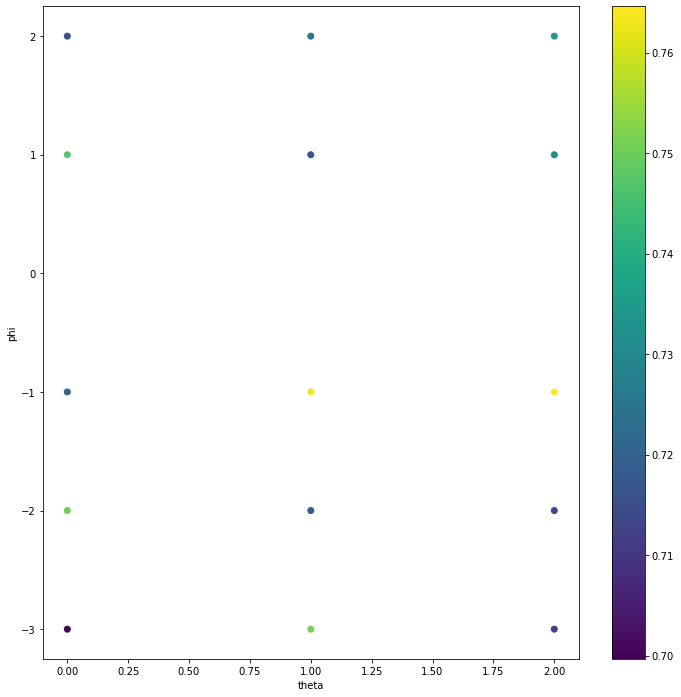

In [5]:
import time 
start = time.time()
emavg = []
delta = 1e-6
max_ang = np.degrees(np.arctan(0.5/p))
#phi = float(input('Enter a phi angle between -90 and 90: '))
#theta = float(input('Enter a theta angle between 0 and 360: '))
ps = []
ts = []
for fuck in range(-3,3):
    for shit in range(0,3):
        em = []
        if fuck == 0:
            pass
        else:
            phi = fuck
            theta = shit
        
            ps.append(fuck)
            ts.append(shit)

            if -max_ang <= phi <= max_ang:
                if 0 <= theta < 30:
                    phi = np.deg2rad(phi)
                    theta = np.deg2rad(theta)
                    x = w[1]
                    y = x*np.tan(theta)
                    z = x*np.tan(phi)
                elif 30 <= theta < 90:
                    theta -= 60
                    phi = np.deg2rad(phi)
                    theta = np.deg2rad(theta)
                    x1 = w[1]
                    y1 = x1*np.tan(theta)
                    z1 = x1*np.tan(phi)
                    new = RRF(np.array([x1, y1, z1]), np.array([0, 0, 1]), np.deg2rad(60))
                    x = new[0]
                    y = new[1]
                    z = new[2]
                elif 90 <= theta < 150:
                    theta -= 120
                    phi = np.deg2rad(phi)
                    theta = np.deg2rad(theta)
                    x1 = w[1]
                    y1 = x1*np.tan(theta)
                    z1 = x1*np.tan(phi)
                    new = RRF(np.array([x1, y1, z1]), np.array([0, 0, 1]), np.deg2rad(60))
                    almost = RRF(np.array([new[0], new[1], new[2]]), np.array([0, 0, 1]) , np.deg2rad(60))
                    x = almost[0]
                    y = almost[1]
                    z = almost[2]
                elif 150 <= theta < 210:
                    theta -= 180
                    phi = np.deg2rad(phi)
                    theta = np.deg2rad(theta)
                    x1 = w[1]
                    y1 = x1*np.tan(theta)
                    z1 = x1*np.tan(phi)
                    new = RRF(np.array([x1, y1, z1]), np.array([0, 0, 1]), np.deg2rad(60))
                    newer = RRF(np.array([new[0], new[1], new[2]]), np.array([0, 0, 1]), np.deg2rad(60))
                    almost = RRF(np.array([newer[0], newer[1], newer[2]]), np.array([0, 0, 1]), np.deg2rad(60))
                    x = almost[0]
                    y = almost[1]
                    z = almost[2]
                elif 210 <= theta < 270:
                    theta -= 240
                    phi = np.deg2rad(phi)
                    theta = np.deg2rad(theta)
                    x1 = w[1]
                    y1 = x1*np.tan(theta)
                    z1 = x1*np.tan(phi)
                    new = RRF(np.array([x1, y1, z1]), np.array([0, 0, 1]), np.deg2rad(-60))
                    almost = RRF(np.array([new[0], new[1], new[2]]), np.array([0, 0, 1]), np.deg2rad(-60))
                    x = almost[0]
                    y = almost[1]
                    z = almost[2]
                elif 270 <= theta < 330:
                    theta -= 300
                    phi = np.deg2rad(phi)
                    theta = np.deg2rad(theta)
                    x1 = w[1]
                    y1 = x1*np.tan(theta)
                    z1 = x1*np.tan(phi)
                    new = RRF(np.array([x1, y1, z1]), np.array([0, 0, 1]), np.deg2rad(-60))
                    x = new[0]
                    y = new[1]
                    z = new[2]
                else:
                    theta -= 360
                    phi = np.deg2rad(phi)
                    theta = np.deg2rad(theta)
                    x = w[1]
                    y = x*np.tan(theta)
                    z = x*np.tan(phi)

            elif phi > max_ang:
                if 0 <= theta < 30:
                    phi = np.deg2rad(phi)
                    theta = np.deg2rad(theta)
                    z = 0.5
                    x = z*np.cos(theta)/np.tan(phi)
                    y = z*np.sin(theta)/np.tan(phi)
                elif 30 <= theta < 90:
                    theta -= 60
                    phi = np.deg2rad(phi)
                    theta = np.deg2rad(theta)
                    z1 = 0.5
                    x1 = z1*np.cos(theta)/np.tan(phi)
                    y1 = z1*np.sin(theta)/np.tan(phi)
                    new = RRF(np.array([x1, y1, z1]), np.array([0, 0, 1]), np.deg2rad(60))
                    x = new[0]
                    y = new[1]
                    z = new[2]
                elif 90 <= theta < 150:
                    theta -= 120
                    phi = np.deg2rad(phi)
                    theta = np.deg2rad(theta)
                    z1 = 0.5
                    x1 = z1*np.cos(theta)/np.tan(phi)
                    y1 = z1*np.sin(theta)/np.tan(phi)
                    new = RRF(np.array([x1, y1, z1]), np.array([0, 0, 1]), np.deg2rad(60))
                    almost = RRF(np.array([new[0], new[1], new[2]]), np.array([0, 0, 1]), np.deg2rad(60))
                    x = almost[0]
                    y = almost[1]
                    z = almost[2]
                elif 150 <= theta < 210:
                    theta -= 180
                    phi = np.deg2rad(phi)
                    theta = np.deg2rad(theta)
                    z1 = 0.5
                    x1 = z1*np.cos(theta)/np.tan(phi)
                    y1 = z1*np.sin(theta)/np.tan(phi)
                    new = RRF(np.array([x1, y1, z1]), np.array([0, 0, 1]), np.deg2rad(60))
                    newer = RRF(np.array([new[0], new[1], new[2]]), np.array([0, 0, 1]), np.deg2rad(60))
                    almost = RRF(np.array([newer[0], newer[1], newer[2]]), np.array([0, 0, 1]), np.deg2rad(60))
                    x = almost[0]
                    y = almost[1]
                    z = almost[2]
                elif 210 <= theta < 270:
                    theta -= 240
                    phi = np.deg2rad(phi)
                    theta = np.deg2rad(theta)
                    z1 = 0.5
                    x1 = z1*np.cos(theta)/np.tan(phi)
                    y1 = z1*np.sin(theta)/np.tan(phi)
                    new = RRF(np.array([x1, y1, z1]), np.array([0, 0, 1]), np.deg2rad(-60))
                    almost = RRF(np.array([new[0], new[1], new[2]]), np.array([0, 0, 1]), np.deg2rad(-60))
                    x = almost[0]
                    y = almost[1]
                    z = almost[2]
                elif 270 <= theta < 330:
                    theta -= 300
                    phi = np.deg2rad(phi)
                    theta = np.deg2rad(theta)
                    z1 = 0.5
                    x1 = z1*np.cos(theta)/np.tan(phi)
                    y1 = z1*np.sin(theta)/np.tan(phi)
                    new = RRF(np.array([x1, y1, z1]), np.array([0, 0, 1]), np.deg2rad(-60))
                    x = new[0]
                    y = new[1]
                    z = new[2]
                else:
                    theta -= 360
                    phi = np.deg2rad(phi)
                    theta = np.deg2rad(theta)
                    z = 0.5
                    x = z*np.cos(theta)/np.tan(phi)
                    y = z*np.sin(theta)/np.tan(phi)

            elif phi < -max_ang:
                if 0 <= theta < 30:
                    phi = np.deg2rad(phi)
                    theta = np.deg2rad(theta)
                    z = -0.5
                    x = z*np.cos(theta)/np.tan(phi)
                    y = z*np.sin(theta)/np.tan(phi)
                elif 30 <= theta < 90:
                    theta -= 60
                    phi = np.deg2rad(phi)
                    theta = np.deg2rad(theta)
                    z1 = -0.5
                    x1 = z1*np.cos(theta)/np.tan(phi)
                    y1 = z1*np.sin(theta)/np.tan(phi)
                    new = RRF(np.array([x1, y1, z1]), np.array([0, 0, 1]), np.deg2rad(60))
                    x = new[0]
                    y = new[1]
                    z = new[2]
                elif 90 <= theta < 150:
                    theta -= 120
                    phi = np.deg2rad(phi)
                    theta = np.deg2rad(theta)
                    z1 = -0.5
                    x1 = z1*np.cos(theta)/np.tan(phi)
                    y1 = z1*np.sin(theta)/np.tan(phi)
                    new = RRF(np.array([x1, y1, z1]), np.array([0, 0, 1]), np.deg2rad(60))
                    almost = RRF(np.array([new[0], new[1], new[2]]), np.array([0, 0, 1]), np.deg2rad(60))
                    x = almost[0]
                    y = almost[1]
                    z = almost[2]
                elif 150 <= theta < 210:
                    theta -= 180
                    phi = np.deg2rad(phi)
                    theta = np.deg2rad(theta)
                    z1 = -0.5
                    x1 = z1*np.cos(theta)/np.tan(phi)
                    y1 = z1*np.sin(theta)/np.tan(phi)
                    new = RRF(np.array([x1, y1, z1]), np.array([0, 0, 1]), np.deg2rad(60))
                    newer = RRF(np.array([new[0], new[1], new[2]]), np.array([0, 0, 1]), np.deg2rad(60))
                    almost = RRF(np.array([newer[0], newer[1], newer[2]]), np.array([0, 0, 1]), np.deg2rad(60))
                    x = almost[0]
                    y = almost[1]
                    z = almost[2]
                elif 210 <= theta < 270:
                    theta -= 240
                    phi = np.deg2rad(phi)
                    theta = np.deg2rad(theta)
                    z1 = -0.5
                    x1 = z1*np.cos(theta)/np.tan(phi)
                    y1 = z1*np.sin(theta)/np.tan(phi)
                    new = RRF(np.array([x1, y1, z1]), np.array([0, 0, 1]), np.deg2rad(-60))
                    almost = RRF(np.array([new[0], new[1], new[2]]), np.array([0, 0, 1]), np.deg2rad(-60))
                    x = almost[0]
                    y = almost[1]
                    z = almost[2]
                elif 270 <= theta < 330:
                    theta -= 300
                    phi = np.deg2rad(phi)
                    theta = np.deg2rad(theta)
                    z1 = -0.5
                    x1 = z1*np.cos(theta)/np.tan(phi)
                    y1 = z1*np.sin(theta)/np.tan(phi)
                    new = RRF(np.array([x1, y1, z1]), np.array([0, 0, 1]), np.deg2rad(-60))
                    x = new[0]
                    y = new[1]
                    z = new[2]
                else:
                    theta -= 360
                    phi = np.deg2rad(phi)
                    theta = np.deg2rad(theta)
                    z = -0.5
                    x = z*np.cos(theta)/np.tan(phi)
                    y = z*np.sin(theta)/np.tan(phi)

            #The mess of code above gets the normal vector based off theta and phi        
            #the next few lines get the actual plane
            center  = np.array([0, 0, 0])
            normal = np.array([x, y, z])

            # a plane is a*x+b*y+c*z+d=0
            # [a,b,c] is the normal. Thus, we have to calculate
            # d and we're set
            d = -center.dot(normal)

            # create x,y
            xx, yy = np.meshgrid(range(-1, 2), range(-1 ,2))

            # calculate corresponding z
            zz = (-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]

            #grab a random point on the plane within the volume

            for var in range(300):

                test = False
                while test != True:
                    xn = np.random.uniform(-w[1], w[1])
                    yn = np.random.uniform(-p,p)
                    zn = (d - normal[0]*xn - normal[1]*yn)/normal[2]
                    if VolumeTester(xn, yn, zn):
                        test = True

                wn = np.array([xn, yn, zn])

                shifted = normal + wn

                #get the ray connecting the shifted points
                t = np.arange(-2, 2, 0.1)
                q = shifted - wn
                rayx = wn[0] + q[0]*t
                rayy = wn[1] + q[1]*t
                rayz = wn[2] + q[2]*t

                #generate lines connecting top and bottom
                #ax = np.zeros(3000)
                #ay = np.arange(-0.5, 0.5, 0.5/50)

                #Grabbing normal vector off each plane
                raypoint = wn
                raydirection = normal

                '''
                pn1 = np.array([np.sqrt(3)/2, 0, 0])
                pn2 = RRF(pn1, np.array([0, 0, 1]), np.deg2rad(60))/np.linalg.norm(RRF(pn1, np.array([0, 0, 1]), np.deg2rad(60)))
                pn3 = RRF(pn2, np.array([0, 0, 1]), np.deg2rad(60))/np.linalg.norm(RRF(pn2, np.array([0, 0, 1]), np.deg2rad(60)))
                pn4 = RRF(pn3, np.array([0, 0, 1]), np.deg2rad(60))/np.linalg.norm(RRF(pn3, np.array([0, 0, 1]), np.deg2rad(60)))
                pn5 = RRF(pn4, np.array([0, 0, 1]), np.deg2rad(60))/np.linalg.norm(RRF(pn4, np.array([0, 0, 1]), np.deg2rad(60)))
                pn6 = RRF(pn5, np.array([0, 0, 1]), np.deg2rad(60))/np.linalg.norm(RRF(pn5, np.array([0, 0, 1]), np.deg2rad(60)))
                pn7 = np.array([0, 0, 1])
                pn8 = -pn7
                '''
                pn1 = np.array([1, 0, 0])
                pn2 = np.array([0.5, np.sqrt(3)/2, 0])
                pn3 = np.array([-0.5, np.sqrt(3)/2, 0])
                pn4 = np.array([-1, 0, 0])
                pn5 = np.array([-0.5, -np.sqrt(3)/2, 0])
                pn6 = np.array([0.5, -np.sqrt(3)/2, 0])
                pn7 = np.array([0, 0, 1])
                pn8 = np.array([0, 0, -1])

                norms = [pn1, pn2, pn3, pn4, pn5, pn6, pn7, pn8]

                #grabbing random point off each plane and finding intersection
                pointsx = [vertx, posxs, negxs, -vertx, negxs, posxs]
                pointsy = [verty, sidey1, sidey2, verty, sidey3, sidey4]

                pp1 = np.array([w[1], 0, 0])
                pp2 = RRF(pp1, np.array([0, 0, 1]), np.deg2rad(60))
                pp3 = RRF(pp2, np.array([0, 0, 1]), np.deg2rad(60))
                pp4 = RRF(pp3, np.array([0, 0, 1]), np.deg2rad(60))
                pp5 = RRF(pp4, np.array([0, 0, 1]), np.deg2rad(60))
                pp6 = RRF(pp5, np.array([0, 0, 1]), np.deg2rad(60))
                pp7 = np.array([0, 0, 0.5])
                pp8 = -pp7

                points = [pp1, pp2, pp3, pp4, pp5, pp6, pp7, pp8]

                pospoint = [LinePlaneCollision(norms[i], points[i], raydirection, raypoint) for i in range(len(norms))]
                check = [np.all(np.isnan(LinePlaneCollision(norms[i], points[i], raydirection, raypoint))) for i in range(len(norms))]
                #print(pospoint)
                #print(check)
                '''
                p= []
                for i in range(len(check)):
                    if not check[i]:
                        p.append(pospoint[i])
                        #print(pospoint[i])
                '''
                pas = []
                fail = []
                for i in range(len(check)):
                    if not check[i]:
                        if VolumeTester(pospoint[i][0], pospoint[i][1], pospoint[i][2]) or VolumeTester(pospoint[i][0] + delta, pospoint[i][1] + delta, pospoint[i][2] + delta) or VolumeTester(pospoint[i][0]-delta, pospoint[i][1]-delta, pospoint[i][2]-delta):
                            pas.append(pospoint[i])
                        else:
                            fail.append(pospoint[i])
                # plot everything
                '''
                %matplotlib notebook

                plt3d = plt.figure(figsize = (6,6)).gca(projection='3d')

                plt3d.plot_wireframe(xx, yy, zz)
                plt3d.plot(Hexagonx, Hexagony, -0.5, color = 'yellow')
                plt3d.plot(Hexagonx, Hexagony, 0.5, color = 'orange')
                plt3d.plot(ax + p, ay, 0, zdir = 'x', color = 'green')
                plt3d.plot(ax - p, ay, 0, zdir = 'x', color = 'green')
                plt3d.plot(ax + w[0], ay, w[1], zdir = 'x', color = 'green')
                plt3d.plot(ax - w[0], ay, w[1], zdir = 'x', color = 'green')
                plt3d.plot(ax + w[0], ay, -w[1], zdir = 'x', color = 'green')
                plt3d.plot(ax - w[0], ay, -w[1], zdir = 'x', color = 'green')
                plt3d.plot(rayx, rayy, rayz, color = 'gray')
                plt3d.scatter(x, y, z, color = 'black')
                #plt3d.scatter(wn[0], wn[1], wn[2], color = 'red')
                #plt3d.scatter(shifted[0], shifted[1], shifted[2], color = 'purple')
                plt3d.scatter(w[1], 0, 0, color = 'blue')
                plt3d.scatter(0, 0, 0, color = 'blue')
                for ps in range(len(pas)):
                    plt3d.scatter(pas[ps][0], pas[ps][1], pas[ps][2])
                    #print(p[ps][0], p[ps][1], p[ps][2])



                plt3d.set_xlabel('x')
                plt3d.set_ylabel('y')
                plt3d.set_zlabel('z')


                plt3d.set_xlim(-1,1)
                plt3d.set_ylim(-1,1)
                plt3d.set_zlim(-1,1)

                plt.show()

                '''
                #print('The equation of the plane is: {}x + {}y + {}z + {} = 0'.format(normal[0], normal[1], normal[2], d))
                #print(wn[0], wn[1], wn[2])
                #print('The points of intersection are: ', pas)
                if len(pas) == 2:
                    #print('The distance between the two points are: ', np.linalg.norm(pas[1] - pas[0]))
                    em.append(np.linalg.norm(pas[1] - pas[0]))
                else:
                    print('Only returned one point or none, not counting this one')
            emavg.append(np.mean(em))
        #print(fuck)
end = time.time()

print(end-start)
#print(np.mean(em))

%matplotlib inline

#t = [1,1,1,1,30, 60, 90, 30, 60, 90, 30, 60, 90]
#p = [1, 30, 60, 90, 1, 1, 1, 30, 30, 30, 60, 60, 60]

#d = [0.72946,0.711638,0.810096,0.993574,0.837666,0.727345,0.837462,0.7339835,0.7187397,0.73098427,0.8241049,0.8120952,0.82230404]
#print(len(em))
#print(ts)
#print(ps)
#emv = [em1, em2, em3, em4, em5, em6, em7, em8, em9, em0]
#print(emv)
plt.figure(figsize = (12,12))
plt.scatter(ts, ps, c=emavg)
plt.colorbar()
plt.xlabel('theta')
plt.ylabel('phi')

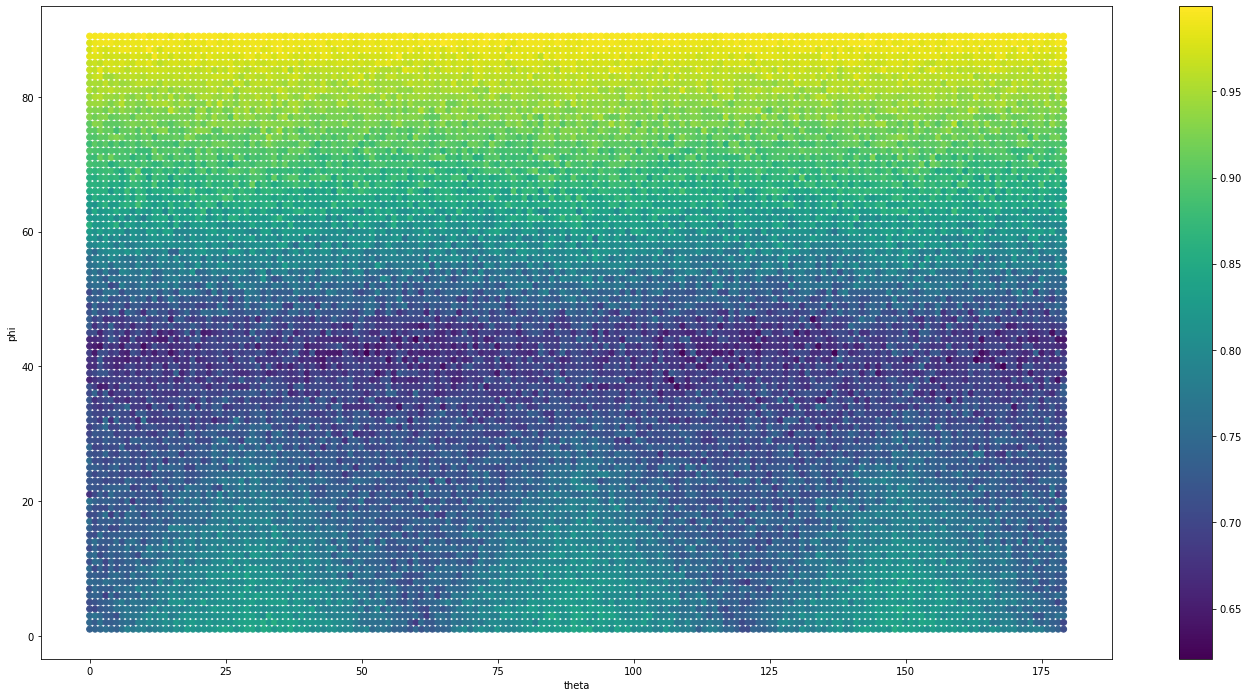

In [19]:
%matplotlib inline

#t = [1,1,1,1,30, 60, 90, 30, 60, 90, 30, 60, 90]
#p = [1, 30, 60, 90, 1, 1, 1, 30, 30, 30, 60, 60, 60]

#d = [0.72946,0.711638,0.810096,0.993574,0.837666,0.727345,0.837462,0.7339835,0.7187397,0.73098427,0.8241049,0.8120952,0.82230404]
#print(len(em))
#print(ts)
#print(ps)
#emv = [em1, em2, em3, em4, em5, em6, em7, em8, em9, em0]
#print(emv)
plt.figure(figsize = (24,12))
plt.scatter(ts, ps, c=emavg)
plt.colorbar()
plt.xlabel('theta')
plt.ylabel('phi')

plt.savefig('Theta V Phi')

In [ ]:
%matplotlib inline
plt.hist(em, bins = 40)
print(np.mean(em))

In [ ]:
%matplotlib inline

plt.hist(pavg, bins = 40)

In [7]:
xxx = [bigpx[i][0] for i in range(len(bigpx))]
yyx = [bigpx[i][1] for i in range(len(bigpx))]
zzx = [bigpx[i][2] for i in range(len(bigpx))]
xxy = [bigpy[i][0] for i in range(len(bigpy))]
yyy = [bigpy[i][1] for i in range(len(bigpy))]
zzy = [bigpy[i][2] for i in range(len(bigpy))]

import pandas as pd

df = pd.DataFrame({'Point 1 X': xxx, 'Point 1 Y': yyx, 'Point 1 Z': zzx,
                  'Point 2 X': xxy, 'Point 2 Y': yyy, 'Point 2 Z': zzy, 'Phi': pphi, 
                   'Theta': pthe, 'Length': pavg})

df
#df.to_csv('1120_meter_info.csv', index = False)

,Point 1 X,Point 1 Y,Point 1 Z,Point 2 X,Point 2 Y,Point 2 Z,Phi,Theta,Length
0,0.014317,0.552008,-0.106121,0.365739,-0.349114,0.475506,-31.313375,111.304925,1.128631
1,0.300382,0.386848,0.112217,-0.156304,0.470031,0.326133,25.098826,169.677037,0.511118
2,-0.398044,0.330463,0.287373,0.327282,-0.371317,0.323857,2.153087,315.945249,1.009913
3,-0.067663,-0.452199,0.500000,-0.024457,0.022687,-0.500000,64.505976,264.801418,1.107873
4,-0.068845,-0.520526,0.247920,0.125352,-0.350394,0.500000,44.314994,41.220842,0.360834
5,0.485211,-0.012820,-0.039682,0.245585,0.336854,-0.500000,-47.358379,124.422228,0.625768
6,0.057944,0.526819,-0.113124,-0.485211,0.200800,-0.453950,-31.604043,210.973525,0.719353
7,0.121953,0.489864,-0.360906,0.188489,-0.130575,0.500000,54.064866,276.121032,1.063264
8,-0.485211,-0.209007,0.275094,-0.253421,-0.380476,0.500000,-40.386312,143.507510,0.365665
9,0.295822,0.389480,0.256293,0.433415,0.046303,0.500000,-33.658609,111.847675,0.442827
